### __GridWorld 10x10__ ###

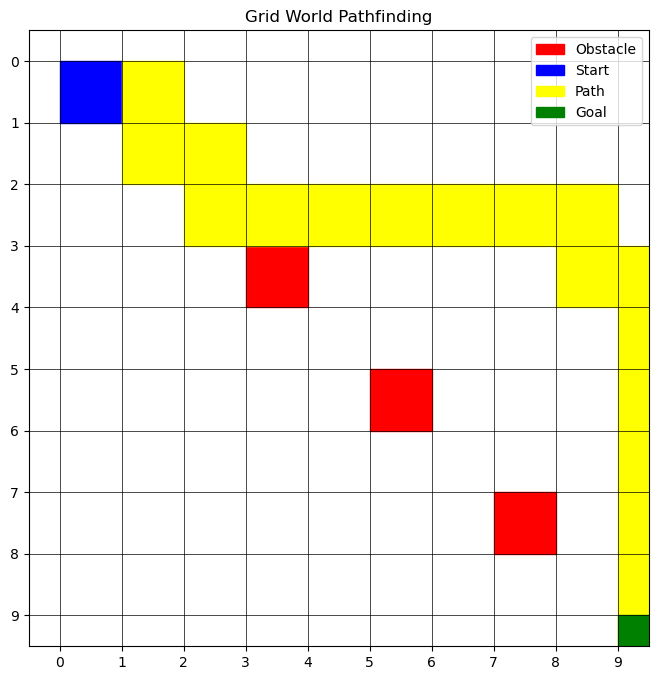

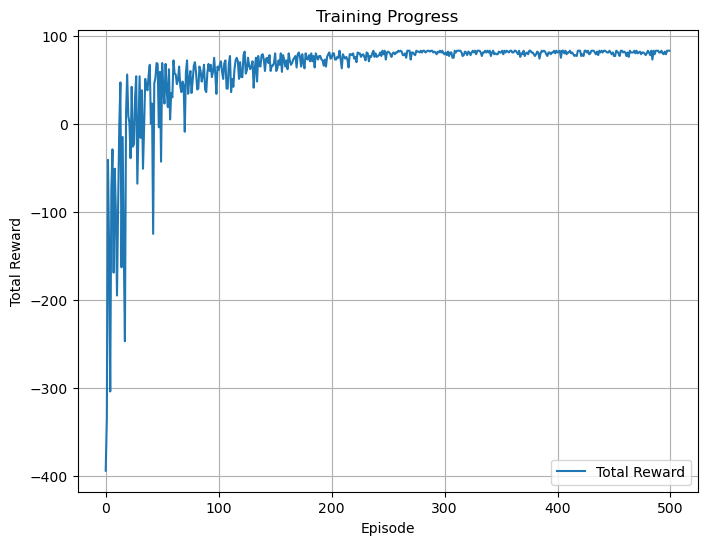

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Grid dimensions and parameters
GRID_SIZE = 10
ALPHA = 0.1  # Learning rate
GAMMA = 0.9  # Discount factor
EPSILON = 0.1  # Exploration rate
EPISODES = 500

# Initialize Q-table and episode rewards
q_table = np.zeros((GRID_SIZE, GRID_SIZE, 4))  # 4 actions (up, down, left, right)
episode_rewards = []

# Actions: [up, down, left, right]
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# Rewards and obstacles
goal = (9, 9)
start = (0, 0)
obstacles = [(3, 3), (5, 5), (7, 7)]
reward_grid = np.full((GRID_SIZE, GRID_SIZE), -1)  # Default reward is -1
reward_grid[goal] = 100  # Goal reward
for obs in obstacles:
    reward_grid[obs] = -100  # Obstacle penalty

def is_valid_state(x, y):
    return 0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE and (x, y) not in obstacles

def choose_action(state):
    if random.uniform(0, 1) < EPSILON:  # Exploration
        return random.randint(0, 3)
    else:  # Exploitation
        x, y = state
        return np.argmax(q_table[x, y])

# Training
for episode in range(EPISODES):
    state = start
    total_reward = 0
    while state != goal:
        x, y = state
        action = choose_action(state)
        dx, dy = actions[action]
        next_state = (x + dx, y + dy)
        
        if not is_valid_state(*next_state):
            next_state = state  # Stay in place if invalid move
        
        reward = reward_grid[next_state]
        next_x, next_y = next_state
        q_table[x, y, action] += ALPHA * (
            reward + GAMMA * np.max(q_table[next_x, next_y]) - q_table[x, y, action]
        )
        total_reward += reward
        state = next_state
    
    episode_rewards.append(total_reward)

# Path visualization
path = []
state = start
while state != goal:
    x, y = state
    action = np.argmax(q_table[x, y])
    dx, dy = actions[action]
    next_state = (x + dx, y + dy)
    if next_state == state or not is_valid_state(*next_state):  # Stuck or invalid
        break
    path.append(next_state)
    state = next_state

# Plot the grid
plt.figure(figsize=(8, 8))
plt.grid(visible=True, which="major", color="black", linestyle="-", linewidth=0.5)
for obs in obstacles:
    plt.gca().add_patch(plt.Rectangle((obs[1], obs[0]), 1, 1, color="red", label="Obstacle" if obs == obstacles[0] else ""))
plt.gca().add_patch(plt.Rectangle((start[1], start[0]), 1, 1, color="blue", label="Start"))
for (i, j) in path:
    plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, color="yellow", label="Path" if (i, j) == path[0] else ""))
plt.gca().add_patch(plt.Rectangle((goal[1], goal[0]), 1, 1, color="green", label="Goal"))

plt.xticks(range(GRID_SIZE))
plt.yticks(range(GRID_SIZE))
plt.xlim(-0.5, GRID_SIZE - 0.5)
plt.ylim(-0.5, GRID_SIZE - 0.5)
plt.title("Grid World Pathfinding")
plt.legend()
plt.gca().invert_yaxis()
plt.show()

# Plot rewards vs episodes
plt.figure(figsize=(8, 6))
plt.plot(range(EPISODES), episode_rewards, label="Total Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress")
plt.legend()
plt.grid()
plt.show()